In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import pandas as pd
# kaggle_json = pd.read_json("/content/drive/MyDrive/Final-Year-Project-Kaggle/kaggle.json", orient="index")
# print(kaggle_json)

In [ ]:
# !pip install kaggle

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle competitions download -c aptos2019-blindness-detection

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !unzip "/content/aptos2019-blindness-detection.zip" -d "/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection"

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
os.listdir('/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection')

['sample_submission.csv',
 'test.csv',
 'train.csv',
 'test_images',
 'train_images']

In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/train.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/sample_submission.csv')

print(train_labels.head())
print(sample_submission.head())


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
        id_code  diagnosis
0  0005cfc8afb6          0
1  003f0afdcd15          0
2  006efc72b638          0
3  00836aaacf06          0
4  009245722fa4          0


In [ ]:
train_path = '/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/train_images'
os.listdir(train_path)

['b8dab47a260e.png',
 'b89938407ee6.png',
 'b8ac328009e0.png',
 'b87f9c59748b.png',
 'b8e9a8f4617d.png',
 'b8ebedd382de.png',
 'b9127e38d9b9.png',
 'b8f1b30877db.png',
 'b91ef82e723a.png',
 'b8fb9f55cd6d.png',
 'b90bc89ce8d8.png',
 'b9519abce0c1.png',
 'b92eacd1392a.png',
 'b927a9238434.png',
 'b94c58d063bf.png',
 'b95d4dd8e5e2.png',
 'b96b518596b3.png',
 'b963a11638f2.png',
 'b960142a8de7.png',
 'b9b6ee2b9453.png',
 'b99794a0beed.png',
 'b99afe7137fb.png',
 'b99c825b93c5.png',
 'b9b99dad668d.png',
 'b98f77098b9d.png',
 'ba2ea9182090.png',
 'b9fe7da14a32.png',
 'b9d0b83d70c3.png',
 'b9bc81fcb075.png',
 'ba4d2c4b3039.png',
 'ba25f947f4ec.png',
 'ba0107fb1bfd.png',
 'ba08cee68c71.png',
 'ba2624883599.png',
 'b9c7c5182075.png',
 'bacfb1029f6b.png',
 'bacfa2b8e706.png',
 'baaca2f7e1f0.png',
 'bb11db08584a.png',
 'badb5ff8d3c7.png',
 'bac1744955c2.png',
 'ba4e62c11cc0.png',
 'bb08949dd70a.png',
 'ba735b286d62.png',
 'bab776139279.png',
 'bb5083fae98f.png',
 'bb9a3d835a94.png',
 'bb2f89488ec

In [ ]:
label = pd.read_csv('/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/train.csv')
label

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


<Axes: xlabel='diagnosis', ylabel='Count'>

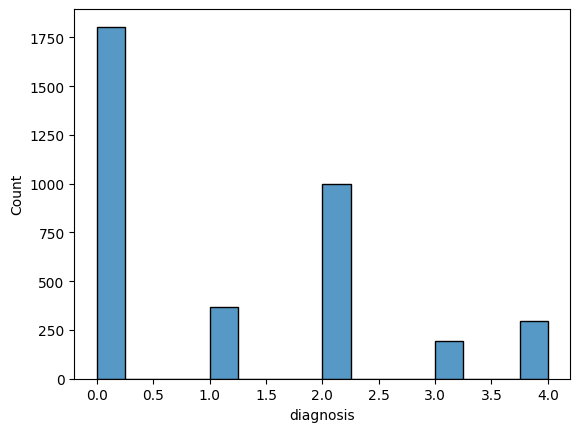

In [ ]:
sns.histplot(label['diagnosis'])

# Task 2 : Perform Data Exploration and Data Visualization

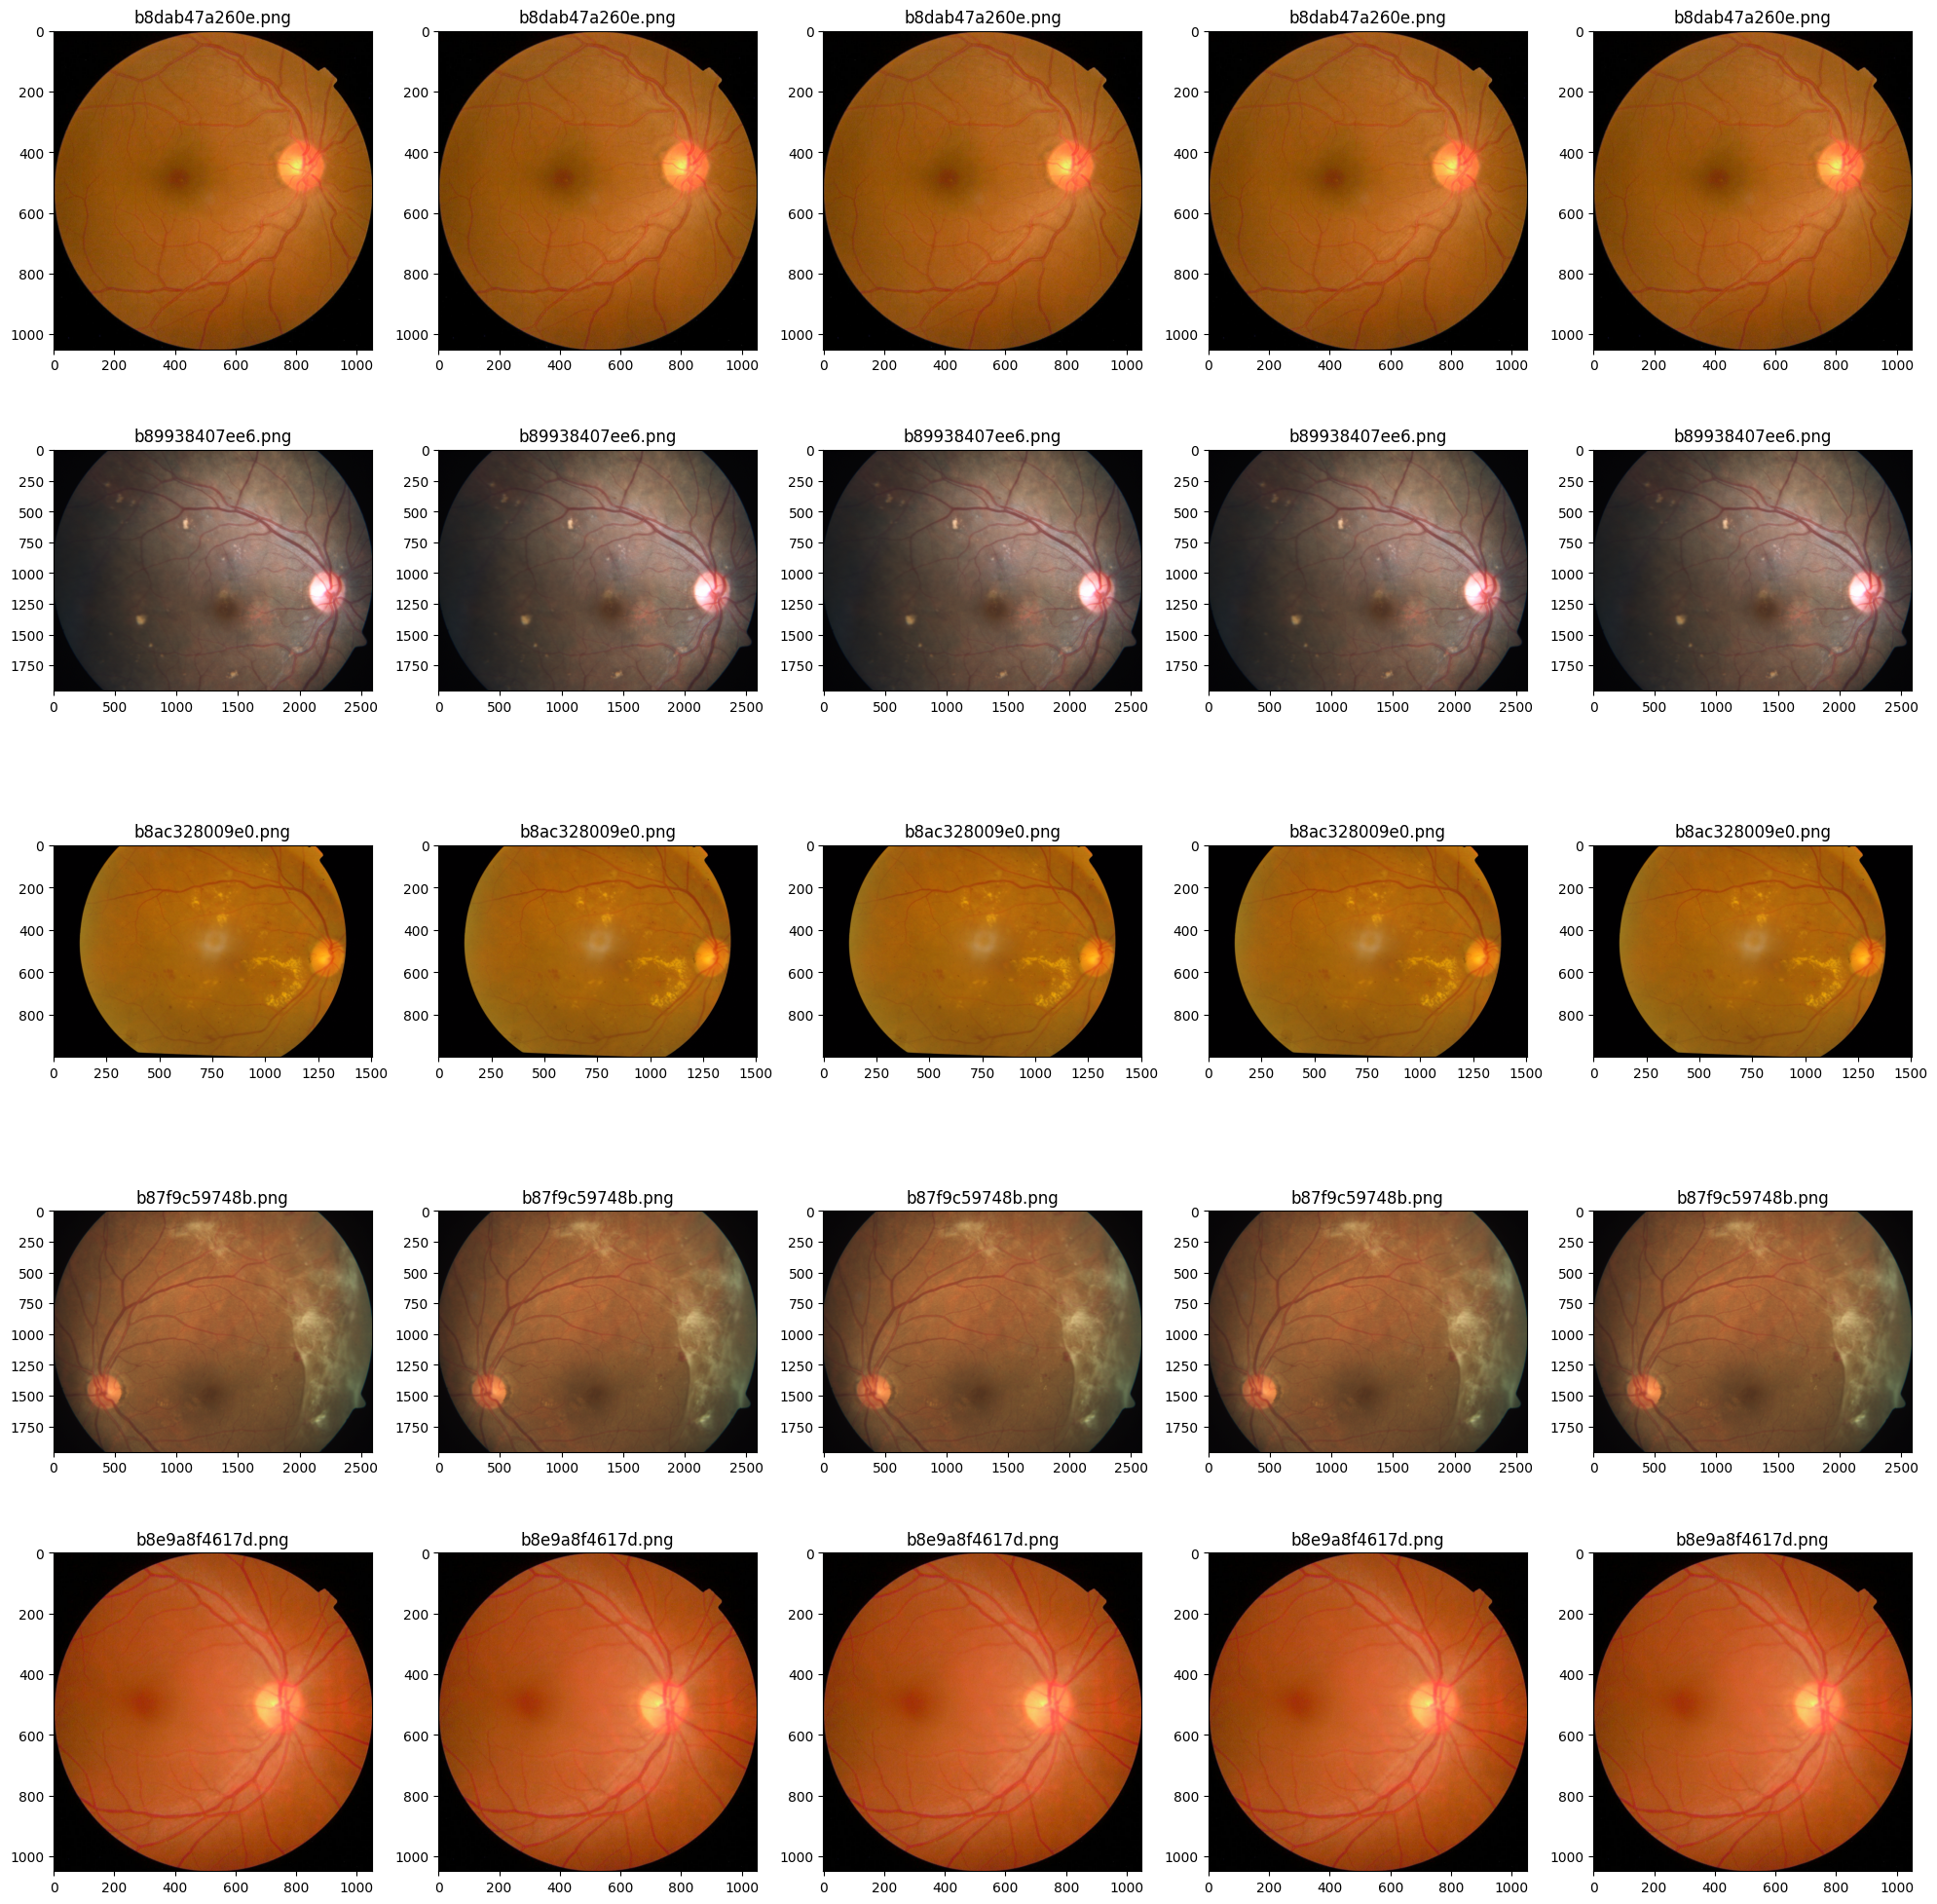

In [ ]:
# Visualise 5 images for each class in the dataset

fig, axes = plt.subplots(5, 5, figsize = (20, 20))
count = 0
# Assuming 'train' contains subdirectories for each class
for i in os.listdir(train_path):
    # Get the list of images in the current class directory
    class_images = os.listdir(train_path)
    #plot 5 images per class
    for j in range(5):
        # Construct the full path to the image
        if count >= 5: # Stop plotting after filling all subplots
            break
        img_path = os.path.join(train_path, i)
        img = PIL.Image.open(img_path)
        axes[count][j].title.set_text(i)
        axes[count][j].imshow(img)
    count +=1

fig.tight_layout()

In [ ]:
#check the number of images in each class in the training dataset

Class_name = ['0','1','2','3','4']
No_images_per_class = []
print(label['diagnosis'].value_counts())
for i in range(5):
    No_images_per_class.append(label['diagnosis'].value_counts()[i])
print(No_images_per_class)

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64
[1805, 370, 999, 193, 295]


In [ ]:
def directory_to_dataframe(directory_path):
    """
    Converts the contents of a directory into a Pandas DataFrame.

    Args:
        directory_path (str): The path to the directory.

    Returns:
        pandas.DataFrame: A DataFrame with file names and their paths.
    """

    file_names = []
    file_paths = []

    for filename in os.listdir(directory_path):
        file_paths.append(os.path.join(directory_path, filename))
        file_names.append(filename)

    df = pd.DataFrame({'filename': file_names, 'filepath': file_paths})
    return df

# Example usage:
directory_path = '/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/train_images'
df = directory_to_dataframe(directory_path)
print(df)

              filename                                           filepath
0     b8dab47a260e.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
1     b89938407ee6.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
2     b8ac328009e0.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
3     b87f9c59748b.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
4     b8e9a8f4617d.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
...                ...                                                ...
3657  2ef4a04aed1b.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
3658  2ef10194e80d.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
3659  2f143453bb71.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
3660  2f284b6a1940.png  /content/drive/MyDrive/Final-Year-Project-Kagg...
3661  2eba4279e503.png  /content/drive/MyDrive/Final-Year-Project-Kagg...

[3662 rows x 2 columns]


In [ ]:
retina_df = pd.DataFrame({'Image':df['filename'], 'Labels':label['diagnosis']})
# retina_df = retina_df.dropna()
print(retina_df)

                 Image  Labels
0     b8dab47a260e.png       2
1     b89938407ee6.png       4
2     b8ac328009e0.png       1
3     b87f9c59748b.png       0
4     b8e9a8f4617d.png       0
...                ...     ...
3657  2ef4a04aed1b.png       2
3658  2ef10194e80d.png       0
3659  2f143453bb71.png       2
3660  2f284b6a1940.png       0
3661  2eba4279e503.png       2

[3662 rows x 2 columns]


In [ ]:
No_images_per_class

[1805, 370, 999, 193, 295]

In [ ]:
Class_name

['0', '1', '2', '3', '4']

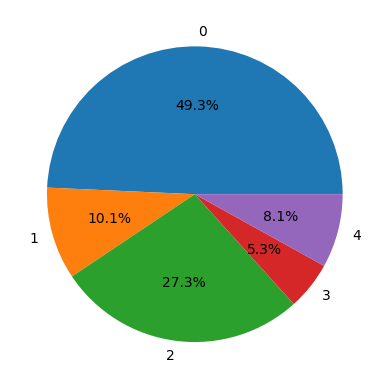

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%');

# TASK #4: PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [ ]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size= 0.2)

In [ ]:
# Create run-time augmentation on training and test dataset
# For training data generator, we add normalization, shear angle, zooming range and horizontal flip

train_datagen = ImageDataGenerator(
            rescale = 1./255,
            shear_range = 0.2,
            vertical_flip = True,
            validation_split = 0.15
            )

# For test data generator, we only normalise the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_path = '/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/test_images'
train_path = '/content/drive/MyDrive/Final-Year-Project-Kaggle/APTOS-Blindness-Detection/train_images'

# Convert the 'Labels' column in the 'train' DataFrame to strings
train['Image'] = train['Image'].astype(str)
train['Labels'] = train['Labels'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=train_path,  # Ensure this path is correct
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    shuffle=True,  # Ensure training data is shuffled
    subset="training"  # Assuming you used validation_split in train_datagen
)


validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=train_path,  # Ensure this path is correct
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    shuffle=False,  # No need to shuffle validation data
    subset="validation"  # Assuming you used validation_split in train_datagen
)


# Convert the 'Labels' column in the 'test' DataFrame to strings

test['Image'] = test['Image'].astype(str)
test['Labels'] = test['Labels'].astype(str)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=test_path,  # Ensure this path is correct
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    shuffle=False  # No need to shuffle test data
)


Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning:

Found 733 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.



In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.3,
    interpolation_order=1,
    dtype=None
)

# TASK 6: BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.initializers import glorot_uniform

def res_block(X, filters, stage):
    # Convolutional block
    X_copy = X

    f1, f2, f3 = filters

    # Main Path
    X = Conv2D(f1, (1, 1), strides=(1, 1), name='res_' + str(stage) + '_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name='res_' + str(stage) + '_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name='res_' + str(stage) + '_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_conv_c')(X)

    # Shortcut Path
    X_copy = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name='res_' + str(stage) + '_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = BatchNormalization(axis=3, name='bn_' + str(stage) + '_conv_copy')(X_copy)

    # Add shortcut to the main path
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X

    # Main Path
    X = Conv2D(f1, (1, 1), name='res_' + str(stage) + '_identity_1_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_identity_1_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name='res_' + str(stage) + '_identity_1_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_identity_1_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name='res_' + str(stage) + '_identity_1_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_identity_1_c')(X)

    # Add shortcut to the main path
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X

    # Main Path
    X = Conv2D(f1, (1, 1), name='res_' + str(stage) + '_identity_2_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_identity_2_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name='res_' + str(stage) + '_identity_2_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_identity_2_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name='res_' + str(stage) + '_identity_2_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_' + str(stage) + '_identity_2_c')(X)

    # Add shortcut to the main path
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X


In [ ]:
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform

# Define the residual block function here or ensure it's imported

input_shape = (256, 256, 3)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

# 2 - stage (Convolutional block followed by identity blocks)
X = res_block(X, filters=[64, 64, 256], stage=2)

# 3 - stage
X = res_block(X, filters=[128, 128, 512], stage=3)

# 4 - stage
X = res_block(X, filters=[256, 256, 1024], stage=4)

# 5 - stage
X = res_block(X, filters=[512, 512, 2048], stage=5)

# Average Pooling
X = AveragePooling2D(pool_size=(2, 2), name='Average_Pooling')(X)

# Final Layer
X = Flatten()(X)
X = Dense(5, activation='softmax', name='Dense_final', kernel_initializer=glorot_uniform(seed=0))(X)

# Create model
model = Model(inputs=X_input, outputs=X, name='ResNet18')

# Summary of the model
model.summary()


Model: "ResNet18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 128, 128, 64)   │          9,472 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 128, 128, 64)   │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 64)   │              0 │ bn_conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_a (Conv2D)     │ (None, 63, 63, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_2_conv_a               │ (None, 63, 63, 64)     │            256 │ res_2_conv_a[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 63, 63, 64)     │              0 │ bn_2_conv_a[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_b (Conv2D)     │ (None, 63, 63, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_2_conv_b               │ (None, 63, 63, 64)     │            256 │ res_2_conv_b[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 63, 63, 64)     │              0 │ bn_2_conv_b[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_c (Conv2D)     │ (None, 63, 63, 256)    │         16,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_copy (Conv2D)  │ (None, 63, 63, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_2_conv_c               │ (None, 63, 63, 256)    │          1,024 │ res_2_conv_c[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_2_conv_copy            │ (None, 63, 63, 256)    │          1,024 │ res_2_conv_copy[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 29,780,613 (113.60 MB)

 Trainable params: 29,738,245 (113.44 MB)

 Non-trainable params: 42,368 (165.50 KB)

# TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Save the best model with the lowest validation loss
checkpointer = ModelCheckpoint(filepath="best_weights.keras", verbose=1, save_best_only=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[checkpointer, earlystopping]
)

In [ ]:
df_history = pd.DataFrame(history.history)
df_history.head()

# TASK #8: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [ ]:
model.load_weights("best_weights.keras")

In [ ]:
# Evaluate the performance of the model on the test set
evaluate = model.evaluate(x = train_generator, steps=test_generator.n // test_generator.batch_size, verbose=1)
# Added the x = parameter to explicitly pass the test_generator as input data
print(f'Test Accuracy: {evaluate[1]:.4f}')

In [ ]:
# Dictionary mapping label indices to names
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
from PIL import Image
import numpy as np

prediction = []
original = []
image = []
count = 0

for index, row in test.iterrows():
    # Get the image path, handling potential NaN values
    img_path = row['Image']
    if pd.isna(img_path):
        print(f"Skipping row {index} due to missing image path.")
        continue  # Skip to the next iteration

    # code to open the image
    try: # Handle the potential FileNotFoundError
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found at path: {img_path}. Skipping this row.")
        continue # Move on to the next image if the current one isn't found

    # resizing the image to (256, 256)
    img = img.resize((256,256))
    # appending image to the image list
    image.append(img)
    # converting image to array
    img = np.asarray(img, dtype = np.float32)
    # normalizing the image
    img = img / 255
    # reshaping the image in to a 4D array
    img = img.reshape(-1, 256, 256, 3)
    # making prediction of the model
    predict = model.predict(img)
    # getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    # appending the predicted class to the list
    prediction.append(labels[predict])
    # appending original class to the list
    original.append(row['Labels'])

In [ ]:
# Getting the test accuracy
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
from PIL import Image
import numpy as np
import pandas as pd # Import pandas for handling DataFrames

prediction = []
original = []
image = []
count = 0

# Assuming 'test' is a pandas DataFrame containing image paths and labels
for index, row in test.iterrows():
    # Get the image path, handling potential NaN values
    img_path = row['Image']
    if pd.isna(img_path):
        print(f"Skipping row {index} due to missing image path.")
        continue  # Skip to the next iteration

    # code to open the image
    try: # Handle the potential FileNotFoundError
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image not found at path: {img_path}. Skipping this row.")
        continue # Move on to the next image if the current one isn't found

    # resizing the image to (256, 256)
    img = img.resize((256,256))
    # appending image to the image list
    image.append(img)
    # converting image to array
    img = np.asarray(img, dtype = np.float32)
    # normalizing the image
    img = img / 255
    # reshaping the image in to a 4D array
    img = img.reshape(-1, 256, 256, 3)
    # making prediction of the model
    predict = model.predict(img)
    # getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    # appending the predicted class to the list
    prediction.append(labels[predict])
    # appending original class to the list
    original.append(row['Labels'])

# Check if the lists were populated
print(f"Number of images processed: {len(image)}")
print(f"Number of predictions: {len(prediction)}")
print(f"Number of original labels: {len(original)}")

In [ ]:
print(classification_report(np.asarray(original), np.asarray(prediction)))


ValueError: max() arg is an empty sequence

ValueError: zero-size array to reduction operation fmin which has no identity

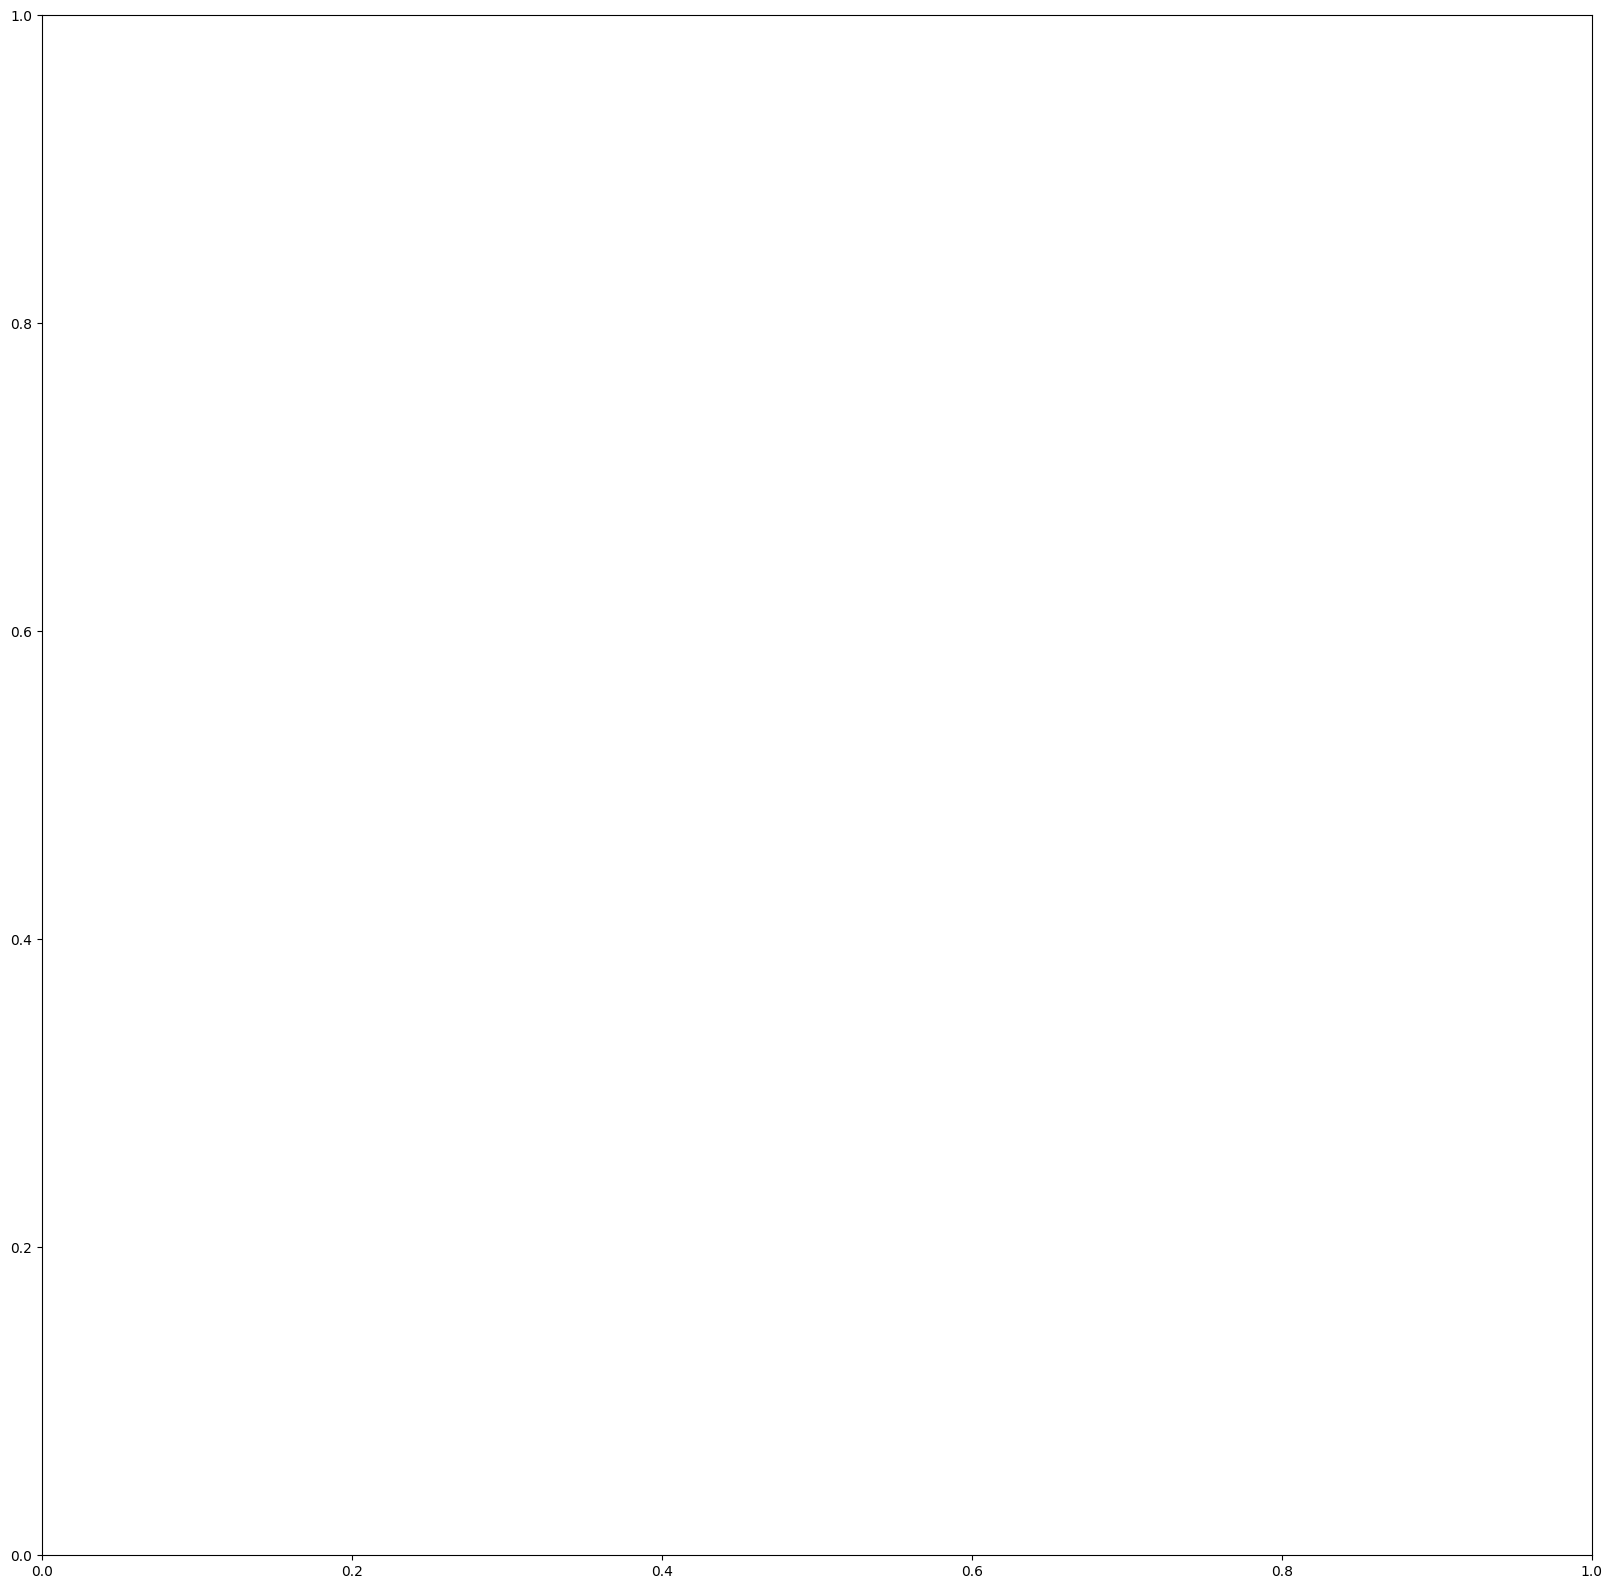

In [ ]:
# plot the confusion matrix

plt.figure(figsize=(20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')